Kernal: PYU2016_Python2

In [1]:
import matplotlib
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Reading in and munging 1995 tree census

In [2]:
trees1995 = pd.read_csv("https://data.cityofnewyork.us/api/views/y75w-icrw/rows.csv")
trees1995.head()

,RecordId,Address,House_Number,Street,Postcode_Original,Community Board_Original,Site,Species,Diameter,Condition,...,Spc_Latin,Council District,Location,BIN,BBL,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,1,245 E 17 ST,245.0,E 17 ST,10003,106,Front,PLAC,8,Unknown,...,PLATANUS ACERIFOLIA,2.0,"(40.734551, -73.984235)",1019566.0,1.008980e+09,11724.0,71.0,4.0,50.0,7.0
1,2,80 N MOORE ST,80.0,N MOORE ST,10013,101,Side,ACPL,7,Good,...,ACER PLATANOIDES,1.0,"(40.720159, -74.010532)",1083157.0,1.001420e+09,12076.0,56.0,4.0,32.0,1.0
2,3,80 N MOORE ST,80.0,N MOORE ST,10013,101,Side,ACPL,6,Good,...,ACER PLATANOIDES,1.0,"(40.720159, -74.010532)",1083157.0,1.001420e+09,12076.0,56.0,4.0,32.0,1.0
3,4,80 N MOORE ST,80.0,N MOORE ST,10013,101,Side,ACPL,7,Excellent,...,ACER PLATANOIDES,1.0,"(40.720159, -74.010532)",1083157.0,1.001420e+09,12076.0,56.0,4.0,32.0,1.0
4,5,80 N MOORE ST,80.0,N MOORE ST,10013,101,Side,ACPL,6,Good,...,ACER PLATANOIDES,1.0,"(40.720159, -74.010532)",1083157.0,1.001420e+09,12076.0,56.0,4.0,32.0,1.0


In [3]:
trees1995.shape

(516989, 35)

In [4]:
trees1995.columns

Index([u'RecordId', u'Address', u'House_Number', u'Street',
       u'Postcode_Original', u'Community Board_Original', u'Site', u'Species',
       u'Diameter', u'Condition', u'Wires', u'Sidewalk_Condition',
       u'Support_Structure', u'Borough', u'X', u'Y', u'Longitude', u'Latitude',
       u'CB_New', u'Zip_New', u'CensusTract_2010', u'CensusBlock_2010',
       u'NTA_2010', u'SegmentID', u'Spc_Common', u'Spc_Latin',
       u'Council District', u'Location', u'BIN', u'BBL', u'Zip Codes',
       u'Community Districts', u'Borough Boundaries',
       u'City Council Districts', u'Police Precincts'],
      dtype='object')

In [5]:
trees1995.drop(['Address', u'House_Number', u'Street',
               'Postcode_Original', u'Community Board_Original', u'Site', u'Species',
               'Diameter', u'Condition', u'Wires', u'Sidewalk_Condition',
               'Support_Structure', u'X', u'Y', u'Longitude', u'Latitude',
               'CB_New', u'Zip_New', u'CensusTract_2010', u'CensusBlock_2010',
               'NTA_2010', u'SegmentID', u'Spc_Common', u'Spc_Latin',
               'Council District', u'Location', u'BIN', u'BBL', u'Zip Codes',
               'Community Districts', u'Borough Boundaries',
               'City Council Districts', u'Police Precincts'], axis=1, inplace=True)

In [6]:
trees1995['Borough'].value_counts()

Queens           227552
Brooklyn         117101
Staten Island     76634
Bronx             48487
Manhattan         47215
Name: Borough, dtype: int64

In [7]:
boro1995 = trees1995.groupby('Borough').count().reset_index()
boro1995.head()

,Borough,RecordId
0,Bronx,48487
1,Brooklyn,117101
2,Manhattan,47215
3,Queens,227552
4,Staten Island,76634


In [8]:
boro1995.columns = ['Borough', '1995 Tree Count']
boro1995

,Borough,1995 Tree Count
0,Bronx,48487
1,Brooklyn,117101
2,Manhattan,47215
3,Queens,227552
4,Staten Island,76634


### Reading in and munging 2005 tree census

In [9]:
trees2005 = pd.read_csv("https://data.cityofnewyork.us/api/views/29bw-z7pj/rows.csv")

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
trees2005.head()

,OBJECTID,cen_year,tree_dbh,address,tree_loc,pit_type,soil_lvl,status,spc_latin,spc_common,...,state,latitude,longitude,x_sp,y_sp,objectid_1,census tract,bin,bbl,Location 1
0,592373,2005,6,1139 57 STREET,Front,Sidewalk Pit,Level,Good,PYRUS CALLERYANA,"PEAR, CALLERY",...,New York,40.632653,-74.000245,984182,169769,0,216.0,3140038.0,3.056890e+09,"(40.63265321, -74.00024499)"
1,592374,2005,6,2220 BERGEN AVENUE,Across,Sidewalk Pit,Level,Good,PLATANUS ACERIFOLIA,LONDON PLANETREE,...,New York,40.620084,-73.901453,1011608,165205,1,706.0,3238037.0,3.084440e+09,"(40.62008375, -73.9014528)"
2,592375,2005,13,2360 BERGEN AVENUE,Front,Continuous Pit,Level,Good,ACER PLATANOIDES CRIMSON KING,"MAPLE, NORWAY-CR KNG",...,New York,40.617996,-73.899111,1012259,164445,2,706.0,3238299.0,3.084530e+09,"(40.61799567, -73.89911096)"
3,592376,2005,13,2254 BERGEN AVENUE,Across,Sidewalk Pit,Level,Good,PLATANUS ACERIFOLIA,LONDON PLANETREE,...,New York,40.619694,-73.901003,1011733,165063,3,706.0,3238045.0,3.084440e+09,"(40.6196936, -73.90100311)"
4,592377,2005,15,2332 BERGEN AVENUE,Across,Sidewalk Pit,Level,Good,PLATANUS ACERIFOLIA,LONDON PLANETREE,...,New York,40.618323,-73.899467,1012160,164564,4,706.0,3238294.0,3.084530e+09,"(40.61832261, -73.89946707)"


In [11]:
trees2005.shape

(592372, 54)

In [12]:
trees2005.columns

Index([u'OBJECTID', u'cen_year', u'tree_dbh', u'address', u'tree_loc',
       u'pit_type', u'soil_lvl', u'status', u'spc_latin', u'spc_common',
       u'vert_other', u'vert_pgrd', u'vert_tgrd', u'vert_wall', u'horz_blck',
       u'horz_grate', u'horz_plant', u'horz_other', u'sidw_crack',
       u'sidw_raise', u'wire_htap', u'wire_prime', u'wire_2nd', u'wire_other',
       u'inf_canopy', u'inf_guard', u'inf_wires', u'inf_paving', u'inf_outlet',
       u'inf_shoes', u'inf_lights', u'inf_other', u'trunk_dmg', u'zipcode',
       u'zip_city', u'cb_num', u'borocode', u'boroname', u'cncldist',
       u'st_assem', u'st_senate', u'nta', u'nta_name', u'boro_ct', u'state',
       u'latitude', u'longitude', u'x_sp', u'y_sp', u'objectid_1',
       u'census tract', u'bin', u'bbl', u'Location 1'],
      dtype='object')

In [13]:
trees2005.drop(['cen_year', u'tree_dbh', u'address', u'tree_loc',
               'pit_type', u'soil_lvl', u'status', 'spc_latin',
               'vert_other', u'vert_pgrd', u'vert_tgrd', u'vert_wall', u'horz_blck',
               'horz_grate', u'horz_plant', u'horz_other', u'sidw_crack',
               'sidw_raise', u'wire_htap', u'wire_prime', u'wire_2nd', u'wire_other',
               'inf_canopy', u'inf_guard', u'inf_wires', u'inf_paving', u'inf_outlet',
               'inf_shoes', u'inf_lights', u'inf_other', u'trunk_dmg', u'zipcode',
               'zip_city', u'cb_num', u'borocode', 'spc_common', 'cncldist',
               'st_assem', u'st_senate', u'nta', u'nta_name', u'boro_ct', u'state',
               'latitude', u'longitude', u'x_sp', u'y_sp', u'objectid_1',
               'census tract', u'bin', u'bbl', u'Location 1'], axis=1, inplace=True)

In [14]:
trees2005.head(10)

,OBJECTID,boroname
0,592373,Brooklyn
1,592374,Brooklyn
2,592375,Brooklyn
3,592376,Brooklyn
4,592377,Brooklyn
5,592378,Brooklyn
6,592379,Brooklyn
7,592380,Brooklyn
8,592381,Brooklyn
9,592382,Brooklyn


In [15]:
trees2005['boroname'].value_counts()

Queens       240008
Brooklyn     142852
5             84468
Bronx         59925
Manhattan     49886
5             15233
Name: boroname, dtype: int64

In [16]:
#Changing 5 to Staten Island

trees2005.loc[trees2005['boroname'] == 5, 'boroname'] = 'Staten Island'
trees2005.loc[trees2005['boroname'] == '5', 'boroname'] = 'Staten Island'
trees2005['boroname'].value_counts()

Queens           240008
Brooklyn         142852
Staten Island     99701
Bronx             59925
Manhattan         49886
Name: boroname, dtype: int64

In [17]:
boro2005 = trees2005.groupby('boroname').count().reset_index()
boro2005.head()

,boroname,OBJECTID
0,Bronx,59925
1,Brooklyn,142852
2,Manhattan,49886
3,Queens,240008
4,Staten Island,99701


In [18]:
boro2005.columns = ['Borough', '2005 Tree Count']
boro2005

,Borough,2005 Tree Count
0,Bronx,59925
1,Brooklyn,142852
2,Manhattan,49886
3,Queens,240008
4,Staten Island,99701


### Reading in and munging 2015 tree census

In [19]:
trees2015 = pd.read_csv("https://data.cityofnewyork.us/api/views/uvpi-gqnh/rows.csv")

In [20]:
trees2015.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


In [21]:
trees2015.columns

Index([u'tree_id', u'block_id', u'created_at', u'tree_dbh', u'stump_diam',
       u'curb_loc', u'status', u'health', u'spc_latin', u'spc_common',
       u'steward', u'guards', u'sidewalk', u'user_type', u'problems',
       u'root_stone', u'root_grate', u'root_other', u'trunk_wire',
       u'trnk_light', u'trnk_other', u'brch_light', u'brch_shoe',
       u'brch_other', u'address', u'postcode', u'zip_city', u'community board',
       u'borocode', u'borough', u'cncldist', u'st_assem', u'st_senate', u'nta',
       u'nta_name', u'boro_ct', u'state', u'latitude', u'longitude', u'x_sp',
       u'y_sp', u'council district', u'census tract', u'bin', u'bbl'],
      dtype='object')

In [22]:
trees2015.drop(['block_id', 'created_at', 'tree_dbh', 'stump_diam','curb_loc', 
               'status', 'health', 'steward', 'guards', 'sidewalk', 'spc_latin',
               'user_type', 'problems','root_stone', 'root_grate', 'root_other', 
               'trunk_wire','trnk_light', 'trnk_other', 'brch_light', 'brch_shoe',
               'brch_other', 'address', 'postcode', 'zip_city', 'community board',
               'borocode','st_assem', 'st_senate', 'nta', 'spc_common', 'cncldist',
               'nta_name', 'boro_ct', 'state', 'latitude', 'longitude', 'x_sp', 
               'y_sp', 'council district', 'census tract', 'bin', 'bbl'], axis=1, inplace=True)

In [23]:
trees2015.head(10)

,tree_id,borough
0,180683,Queens
1,200540,Queens
2,204026,Brooklyn
3,204337,Brooklyn
4,189565,Brooklyn
5,190422,Manhattan
6,190426,Manhattan
7,208649,Manhattan
8,209610,Staten Island
9,192755,Brooklyn


In [24]:
trees2015['borough'].value_counts()

Queens           250551
Brooklyn         177293
Staten Island    105318
Bronx             85203
Manhattan         65423
Name: borough, dtype: int64

In [25]:
boro2015 = trees2015.groupby('borough').count().reset_index()
boro2015.head()

,borough,tree_id
0,Bronx,85203
1,Brooklyn,177293
2,Manhattan,65423
3,Queens,250551
4,Staten Island,105318


In [26]:
boro2015.columns = ['Borough', '2015 Tree Count']
boro2015

,Borough,2015 Tree Count
0,Bronx,85203
1,Brooklyn,177293
2,Manhattan,65423
3,Queens,250551
4,Staten Island,105318


### Merging data

In [27]:
combined = boro1995.merge(boro2005, how='left')
combined

,Borough,1995 Tree Count,2005 Tree Count
0,Bronx,48487,59925
1,Brooklyn,117101,142852
2,Manhattan,47215,49886
3,Queens,227552,240008
4,Staten Island,76634,99701


In [28]:
combined = combined.merge(boro2015, how='left')
combined

,Borough,1995 Tree Count,2005 Tree Count,2015 Tree Count
0,Bronx,48487,59925,85203
1,Brooklyn,117101,142852,177293
2,Manhattan,47215,49886,65423
3,Queens,227552,240008,250551
4,Staten Island,76634,99701,105318


### Making visualization

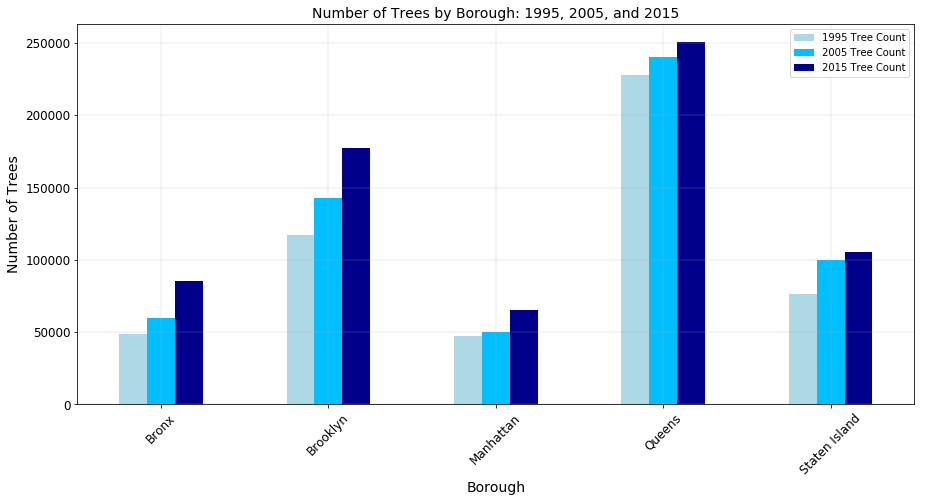

In [31]:
combined.plot(kind='bar', figsize=(15,7), color = ('lightblue', 'deepskyblue', 'darkblue'))
plt.ylabel("Number of Trees", fontsize='14')
plt.xlabel("Borough", fontsize='14')
plt.title('Number of Trees by Borough: 1995, 2005, and 2015', fontsize='14')
plt.xticks(arange(5), ('Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'), fontsize='12', rotation=45)
plt.yticks(fontsize='12')
plt.grid(linewidth=0.25)

### Fig 1. This plot shows the increase in the number of trees by borough at the 1995, 2005, and 2015 tree censuses. It demonstrates that all boroughs have continuously seen an increase in the number of trees since 1995. 